In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Load the dataset
movie_data = pd.read_csv('data/IMDB-Movie-Data.csv')

# Data Cleaning
# Handling missing values in 'Revenue (Millions)'
movie_data_clean = movie_data.dropna(subset=['Revenue (Millions)'])

# Feature Engineering
# Simplifying the actors column - taking only the first actor
movie_data_clean['Lead Actor'] = movie_data_clean['Actors'].apply(lambda x: x.split(',')[0])

# Selecting features for the model
features = ['Rating', 'Votes', 'Runtime (Minutes)', 'Genre', 'Director', 'Lead Actor']
target = 'Revenue (Millions)'

# Data and target
X = movie_data_clean[features]
y = movie_data_clean[target]

# Defining categorical and numerical features
categorical_features = ['Genre', 'Director', 'Lead Actor']
numerical_features = ['Rating', 'Votes', 'Runtime (Minutes)']

# Creating transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Data Transformation
X_transformed = preprocessor.fit_transform(X)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [2]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Training and Evaluating Linear Regression
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# Training and Evaluating Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Training and Evaluating Gradient Boosting
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

# Print the scores
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)


Linear Regression RMSE: 120.34120663577627
Random Forest RMSE: 82.70873820502295
Gradient Boosting RMSE: 77.83762986871209


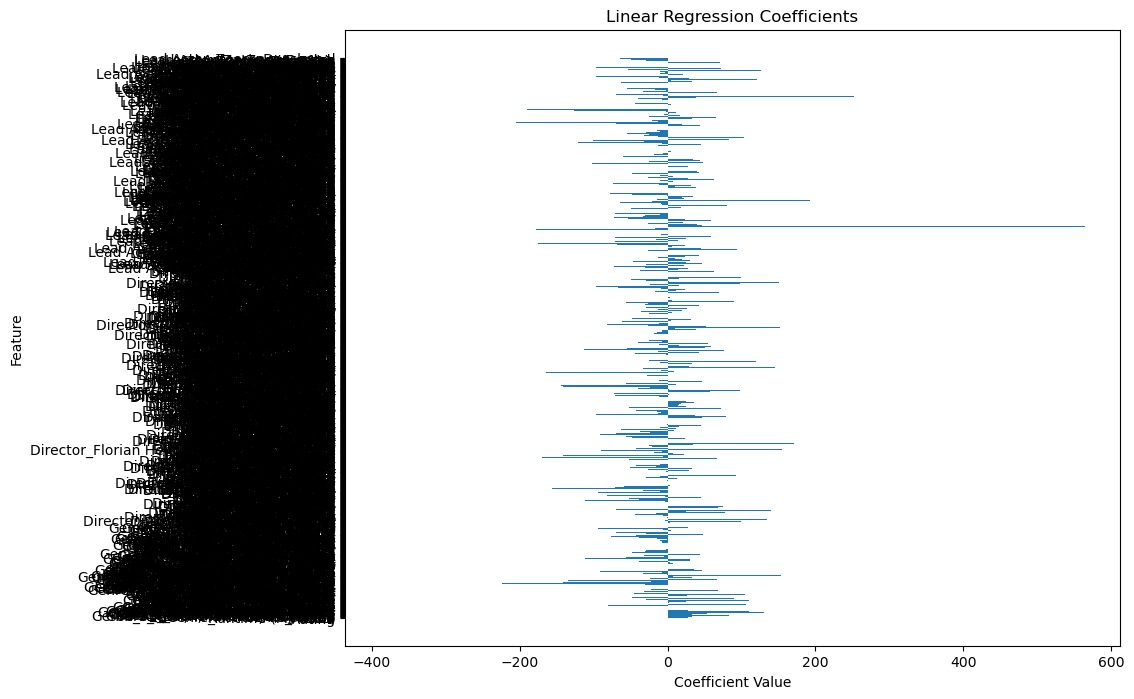

In [4]:
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + feature_names.tolist()

# Coefficients from the model
lr_coefficients = lr_model.coef_

# Plotting the coefficients
plt.figure(figsize=(10, 8))
plt.barh(all_feature_names, lr_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.show()


### Too Many Dummy Variables to Visualize all co effecients, gotta come up with a different solution.

In [9]:
# Extract feature names from the preprocessor
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + feature_names.tolist()

# Get coefficients and pair with feature names
lr_coef_pairs = zip(all_feature_names, lr_model.coef_)
lr_top_features = sorted(lr_coef_pairs, key=lambda x: abs(x[1]), reverse=True)[:10]  # Top 10 features

# Convert to DataFrame for display
lr_top_features_df = pd.DataFrame(lr_top_features, columns=['Feature', 'Coefficient'])


In [16]:
lr_top_features_df

,Feature,Coefficient
0,Lead Actor_Daisy Ridley,564.405457
1,Lead Actor_Daniel Brühl,-388.595510
2,Director_Colin Trevorrow,360.349803
3,Lead Actor_Jeff Bridges,308.305880
4,Director_David Dobkin,-290.665490
5,Director_Joseph Kosinski,-253.074467
6,Lead Actor_Robert Downey Jr.,252.623590
7,"Genre_Adventure,Drama,History",-224.117972
8,"Genre_Biography,Drama,Mystery",-214.459129
9,Director_Dave Green,-207.318440


In [17]:
# Get importances and pair with feature names
rf_importance_pairs = zip(all_feature_names, rf_model.feature_importances_)
rf_top_features = sorted(rf_importance_pairs, key=lambda x: x[1], reverse=True)[:10]  # Top 10 features

# Convert to DataFrame for display
rf_top_features_df = pd.DataFrame(rf_top_features, columns=['Feature', 'Importance'])


In [18]:
rf_top_features_df

,Feature,Importance
0,Votes,0.496364
1,Rating,0.075905
2,Lead Actor_Daisy Ridley,0.061244
3,Runtime (Minutes),0.051161
4,"Genre_Animation,Adventure,Comedy",0.040097
5,Director_Colin Trevorrow,0.018339
6,Director_J.J. Abrams,0.014600
7,"Genre_Adventure,Drama,Fantasy",0.012909
8,Lead Actor_Ellen DeGeneres,0.012118
9,"Genre_Action,Adventure,Sci-Fi",0.010446


In [19]:
# Get importances and pair with feature names
gb_importance_pairs = zip(all_feature_names, gb_model.feature_importances_)
gb_top_features = sorted(gb_importance_pairs, key=lambda x: x[1], reverse=True)[:10]  # Top 10 features

# Convert to DataFrame for display
gb_top_features_df = pd.DataFrame(gb_top_features, columns=['Feature', 'Importance'])


In [21]:
gb_top_features_df

,Feature,Importance
0,Votes,0.535288
1,Rating,0.059593
2,Lead Actor_Daisy Ridley,0.058195
3,"Genre_Animation,Adventure,Comedy",0.053028
4,Runtime (Minutes),0.037102
5,"Genre_Adventure,Drama,Fantasy",0.023387
6,Director_Colin Trevorrow,0.023262
7,"Genre_Action,Adventure,Sci-Fi",0.018355
8,Lead Actor_Chris Pratt,0.017553
9,Director_J.J. Abrams,0.015420


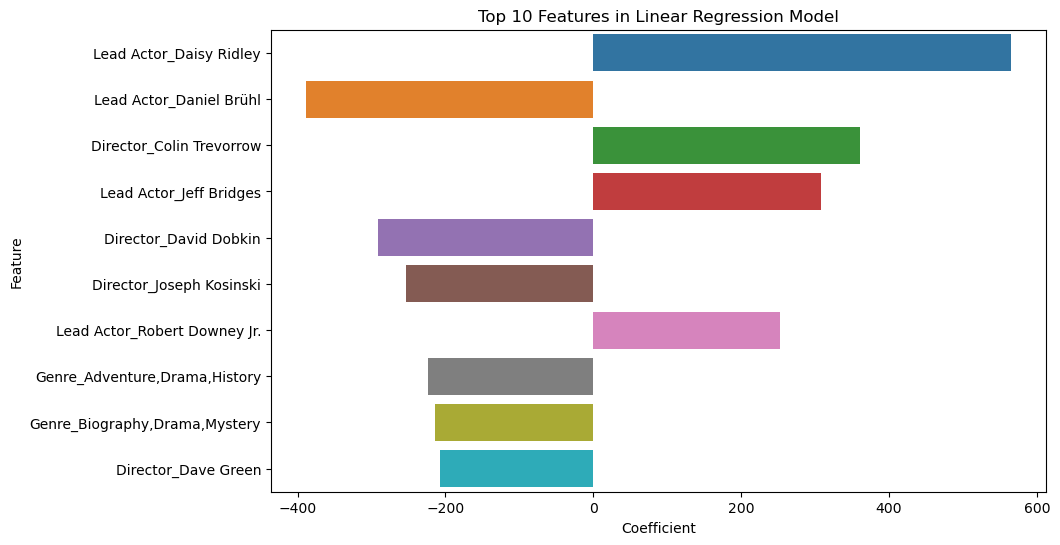

In [23]:
import seaborn as sns
# Visualize top features for Linear Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_top_features_df)
plt.title('Top 10 Features in Linear Regression Model')
plt.show()


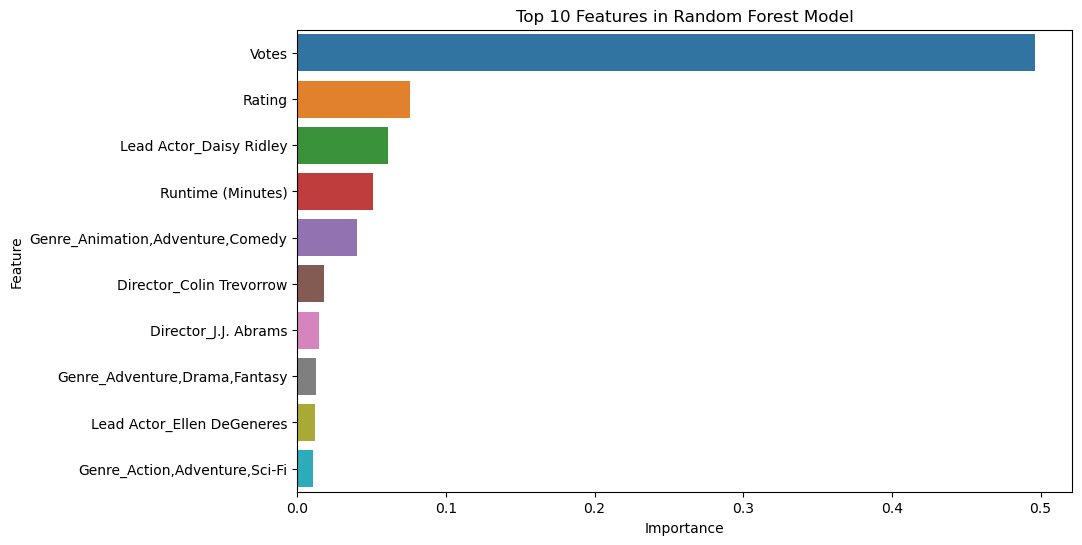

In [24]:
# Visualize top features for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_top_features_df)
plt.title('Top 10 Features in Random Forest Model')
plt.show()


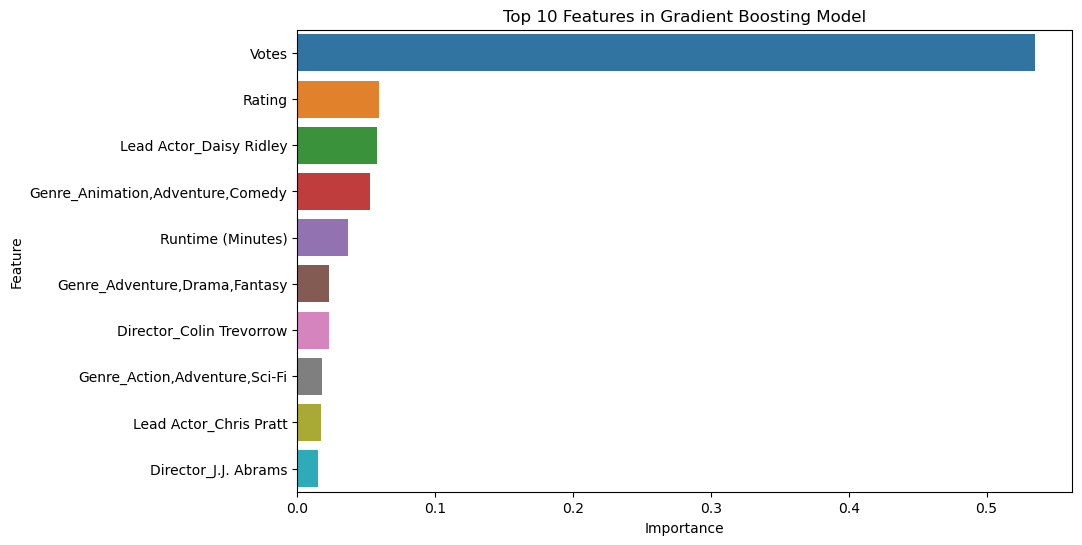

In [25]:
# Visualize top features for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_top_features_df)
plt.title('Top 10 Features in Gradient Boosting Model')
plt.show()


# General Observations:
* Linear Regression Coefficients: The visualization helps in understanding the direct influence of each feature on movie revenues. Features with high absolute coefficient values are most influential.

* Random Forest and Gradient Boosting Feature Importances: These visualizations provide insights into the features that most significantly impact the model's decision-making process. Unlike Linear Regression, these importances do not directly imply the direction (positive or negative) of the impact on revenue.

* The choice of model depends on the dataset's complexity and the nature of relationships between features and the target variable.
Ensemble models like Random Forest and Gradient Boosting are typically more powerful for capturing complex patterns but may require more computational resources and careful tuning.
The top features identified by each model can guide business strategies, such as focusing on specific genres, directors, or actors to maximize revenue.
The differing results between models underscore the importance of trying multiple modeling approaches and comparing their results to get a comprehensive view.
# Conclusion:
* The analysis of the IMDB movie dataset using these models provides valuable insights into factors influencing movie revenues. By comparing the results of different models, you can gain a deeper understanding of the underlying patterns and relationships within the data. These insights can inform decision-making in the movie industry, from production to marketing strategies.






